In [15]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns
dfu=pd.read_csv('Uber Request Data.csv')

In [16]:
dfu.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


# get hands dirty

In [17]:
#dfu=dfu.sort_values('Request id',ascending=True)
#dfu['dummy']=dfu['Request timestamp'].str.replace('/','-')
#dfu.head()
pd.to_datetime(dfu[dfu['Request timestamp'].str.contains('/')]['Request timestamp']).dt.strftime('%Y-%m-%d %h:%m:s%.%f').head()

0    2016-11-07 11:51:00
1    2016-11-07 17:57:00
2    2016-12-07 09:17:00
3    2016-12-07 21:08:00
9    2016-11-07 06:46:00
Name: Request timestamp, dtype: object

In [114]:
#print(pd.to_datetime('14-7-2016 11:51:25'))
#print(pd.to_datetime('13-07-2016 09:25:47'))
dfu['dummy']=pd.to_datetime(dfu['Request timestamp'].loc[:3])
dfu['dummy1']=dfu['dummy'].dt.strftime('%Y/%m/%d %h:%m:s%.%f')
dfu.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,dummy,dummy1
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00,2016-11-07 11:51:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00,2016-11-07 17:57:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07 09:17:00,2016-12-07 09:17:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07 21:08:00,2016-12-07 21:08:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,NaT,NaT


In [160]:
# '/' in dfu.iloc['Request timestamp']
# dfu['Request timestamp'].str.contains('-').sum()
dfu[dfu['Request timestamp'].str.contains('/')].head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,dummy,dummy1
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00,2016-11-07 11:51:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00,2016-11-07 17:57:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07 09:17:00,2016-12-07 09:17:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07 21:08:00,2016-12-07 21:08:00
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,NaT,NaT


In [158]:
#dfu['dummy']=dfu['Request timestamp'].str.replace('/','-')
pd.to_datetime(dfu[dfu['Request timestamp'].str.contains('/')]['Request timestamp']).dt.strftime('%Y-%m-%d %h:%m:s%.%f').head()


0    2016-11-07 11:51:00
1    2016-11-07 17:57:00
2    2016-12-07 09:17:00
3    2016-12-07 21:08:00
9    2016-11-07 06:46:00
Name: Request timestamp, dtype: object

In [18]:
dfu['Drop timestamp']=pd.to_datetime(dfu['Drop timestamp'])
dfu['Request timestamp']=pd.to_datetime(dfu['Request timestamp'])

In [19]:
((dfu['Drop timestamp'].dt.hour)-(dfu['Request timestamp'].dt.hour)).head()

0    2.0
1    1.0
2    0.0
3    1.0
4    1.0
dtype: float64

In [31]:
dfu.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [20]:
dfu[dfu['Driver id'].isnull() & (dfu['Pickup point']=='Airport')].head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4098,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
4099,7,Airport,NaN,No Cars Available,2016-11-07 00:30:00,NaT
4104,16,Airport,NaN,No Cars Available,2016-11-07 01:09:00,NaT
4105,14,Airport,NaN,No Cars Available,2016-11-07 01:10:00,NaT
4108,17,Airport,NaN,No Cars Available,2016-11-07 01:16:00,NaT


In [21]:
df['day_of_week'] = df['my_dates'].dt.day_name()

NameError: name 'df' is not defined

In [22]:
dfu['RDate']=dfu['Request timestamp'].dt.date

dfu['DDate']=dfu['Drop timestamp'].dt.date
dfu['RTime']=dfu['Request timestamp'].dt.time
dfu['DTime']=dfu['Drop timestamp'].dt.time

In [23]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
RDate                6745 non-null object
DDate                2831 non-null object
RTime                6745 non-null object
DTime                2831 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 527.0+ KB


In [24]:
#dfu['day_of_week'] = dfu['RDate'].dt.day_name()
dfu['RDate']=pd.to_datetime(dfu['RDate'])
#dfu['RTime']=pd.to_datetime(dfu['RTime'])
dfu['DDate']=pd.to_datetime(dfu['DDate'])
#dfu['DTime']=pd.to_datetime(dfu['DTime'])

In [25]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
RDate                6745 non-null datetime64[ns]
DDate                2831 non-null datetime64[ns]
RTime                6745 non-null object
DTime                2831 non-null object
dtypes: datetime64[ns](4), float64(1), int64(1), object(4)
memory usage: 527.0+ KB


In [26]:
dfu['day_of_week'] = dfu['RDate'].dt.day_name()
# -------------- or --------------
dfu['day_of_week'] = dfu['RDate'].dt.weekday_name

In [27]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
RDate                6745 non-null datetime64[ns]
DDate                2831 non-null datetime64[ns]
RTime                6745 non-null object
DTime                2831 non-null object
day_of_week          6745 non-null object
dtypes: datetime64[ns](4), float64(1), int64(1), object(5)
memory usage: 579.7+ KB


In [28]:
dfu.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RDate,DDate,RTime,DTime,day_of_week
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,2016-11-07,11:51:00,13:00:00,Monday
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,2016-11-07,17:57:00,18:47:00,Monday
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,2016-12-07,09:17:00,09:58:00,Wednesday
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,2016-12-07,21:08:00,22:03:00,Wednesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,2016-07-13,08:33:16,09:25:47,Wednesday


In [39]:
#(dfu['DTime']-dfu['RTime']).astype('timedelta64[h]')
pd.Timedelta(dfu['Drop timestamp']-dfu['Request timestamp']).seconds

#(pd.Timestamp((dfu[~dfu['Drop timestamp'].isnull()])-(dfu[~dfu['Request timestamp'].isnull()]))).astype('timedelta64[h]')

# Below code working
#(pd.to_datetime(dfu['Drop timestamp'])-pd.to_datetime(dfu['Request timestamp'])).head()

ValueError: Value must be Timedelta, string, integer, float, timedelta or convertible

In [60]:
t1 = pd.to_datetime('1/1/2015 01:00')
t2 = pd.to_datetime('5/1/2015 03:30')

#pd.Timedelta(t2 - t1).seconds / 3600.0
t2-t1

Timedelta('120 days 02:30:00')

In [41]:
dfu[~dfu['Request timestamp'].isnull()].head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TripDuration,day_of_week
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,01:09:00,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,00:50:00,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,00:41:00,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,00:55:00,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,Wednesday


In [64]:
(dfu['Drop timestamp']-dfu['Request timestamp']).isnull().sum()

3914

In [14]:
dfu['Gap']=dfu['Drop timestamp']-dfu['Request timestamp']

In [85]:
dfu.to_csv(r'C:\Users\ux012045\Desktop\PGDD\CaseStudies\02122018\v1.csv')

In [76]:
#dfu.drop('DDate', axis=1)

In [84]:
dfu[~(dfu['RDate']==dfu['DDate'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RDate,RTime,DDate,DTime,day_of_week,Gap
75,1346,Airport,9.0,Trip Completed,2016-11-07 23:39:00,2016-12-07 00:23:00,2016-11-07,23:39:00,2016-12-07,00:23:00,Monday,29 days 00:44:00
81,4023,City,9.0,Trip Completed,2016-07-13 23:58:41,2016-07-14 00:58:39,2016-07-13,23:58:41,2016-07-14,00:58:39,Wednesday,0 days 00:59:58
131,6733,Airport,14.0,Trip Completed,2016-07-15 23:32:44,2016-07-16 00:37:46,2016-07-15,23:32:44,2016-07-16,00:37:46,Friday,0 days 01:05:02
133,2675,Airport,15.0,Trip Completed,2016-12-07 23:43:00,2016-07-13 00:35:12,2016-12-07,23:43:00,2016-07-13,00:35:12,Wednesday,-148 days +00:52:12
143,2661,Airport,16.0,Trip Completed,2016-12-07 23:23:00,2016-07-13 00:27:21,2016-12-07,23:23:00,2016-07-13,00:27:21,Wednesday,-148 days +01:04:21
160,5367,Airport,17.0,Trip Completed,2016-07-14 23:35:34,2016-07-15 00:25:26,2016-07-14,23:35:34,2016-07-15,00:25:26,Thursday,0 days 00:49:52
211,5366,Airport,22.0,Trip Completed,2016-07-14 23:27:22,2016-07-15 00:19:50,2016-07-14,23:27:22,2016-07-15,00:19:50,Thursday,0 days 00:52:28
245,2667,Airport,25.0,Trip Completed,2016-12-07 23:35:00,2016-07-13 00:40:52,2016-12-07,23:35:00,2016-07-13,00:40:52,Wednesday,-148 days +01:05:52
285,6710,City,28.0,Trip Completed,2016-07-15 23:02:36,2016-07-16 00:12:12,2016-07-15,23:02:36,2016-07-16,00:12:12,Friday,0 days 01:09:36
307,6731,Airport,30.0,Trip Completed,2016-07-15 23:23:55,2016-07-16 00:11:55,2016-07-15,23:23:55,2016-07-16,00:11:55,Friday,0 days 00:48:00


 # Clean your hands

In [32]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns
dfu=pd.read_csv('Uber Request Data.csv')

print(dfu.info())
dfu.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [33]:
dfu['Drop timestamp']=pd.to_datetime(dfu['Drop timestamp'],dayfirst=True)
dfu['Request timestamp']=pd.to_datetime(dfu['Request timestamp'],dayfirst=True)
dfu.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [34]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [35]:
dfu['TripDuration']=dfu['Drop timestamp']-dfu['Request timestamp']
dfu.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TripDuration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,01:09:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,00:50:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,00:41:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31


In [37]:
dfu['day_of_week'] = dfu['Request timestamp'].dt.day_name()
# -------------- or --------------
dfu['day_of_week'] = dfu['Request timestamp'].dt.weekday_name
dfu.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TripDuration,day_of_week
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,01:09:00,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,00:50:00,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,00:41:00,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,00:55:00,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,Wednesday


In [38]:
dfu.to_csv(r'C:\Users\ux012045\Desktop\PGDD\CaseStudies\02122018\v2.csv')

In [48]:
dfu[~(dfu['Request timestamp'].dt.date==dfu['Drop timestamp'].dt.date)]
# Most of the records are on friday and status = No cars available

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TripDuration,day_of_week
75,1346,Airport,9.0,Trip Completed,2016-07-11 23:39:00,2016-07-12 00:23:00,00:44:00,Monday
81,4023,City,9.0,Trip Completed,2016-07-13 23:58:41,2016-07-14 00:58:39,00:59:58,Wednesday
131,6733,Airport,14.0,Trip Completed,2016-07-15 23:32:44,2016-07-16 00:37:46,01:05:02,Friday
133,2675,Airport,15.0,Trip Completed,2016-07-12 23:43:00,2016-07-13 00:35:12,00:52:12,Tuesday
143,2661,Airport,16.0,Trip Completed,2016-07-12 23:23:00,2016-07-13 00:27:21,01:04:21,Tuesday
160,5367,Airport,17.0,Trip Completed,2016-07-14 23:35:34,2016-07-15 00:25:26,00:49:52,Thursday
211,5366,Airport,22.0,Trip Completed,2016-07-14 23:27:22,2016-07-15 00:19:50,00:52:28,Thursday
245,2667,Airport,25.0,Trip Completed,2016-07-12 23:35:00,2016-07-13 00:40:52,01:05:52,Tuesday
285,6710,City,28.0,Trip Completed,2016-07-15 23:02:36,2016-07-16 00:12:12,01:09:36,Friday
307,6731,Airport,30.0,Trip Completed,2016-07-15 23:23:55,2016-07-16 00:11:55,00:48:00,Friday


In [52]:
dfu[~(dfu['Request timestamp'].dt.date==dfu['Drop timestamp'].dt.date)&dfu['Drop timestamp'].isnull()&(dfu['day_of_week']=='Friday')].head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TripDuration,day_of_week
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,NaT,Friday
2851,5547,City,6.0,Cancelled,2016-07-15 05:30:31,NaT,NaT,Friday
2852,5699,City,6.0,Cancelled,2016-07-15 07:25:53,NaT,NaT,Friday
2853,5701,City,6.0,Cancelled,2016-07-15 07:34:00,NaT,NaT,Friday
2883,5784,City,16.0,Cancelled,2016-07-15 08:34:59,NaT,NaT,Friday


In [ ]:
#pivot and groupby

In [53]:
dfu.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TripDuration,day_of_week
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,01:09:00,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,00:50:00,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,00:41:00,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,00:55:00,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,Wednesday


In [66]:
dfu['Request Date']=pd.to_datetime(dfu['Request timestamp'].dt.date)
dfu['Drop Date']=pd.to_datetime(dfu['Drop timestamp'].dt.date)
dfu['Request Time']=dfu['Request timestamp'].dt.time
dfu['Drop Time']=dfu['Drop timestamp'].dt.time
dfu.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TripDuration,day_of_week,Request Date,Drop Date,Request Time,Drop Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,01:09:00,Monday,2016-07-11,2016-07-11,11:51:00,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,00:50:00,Monday,2016-07-11,2016-07-11,17:57:00,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,00:41:00,Tuesday,2016-07-12,2016-07-12,09:17:00,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,00:55:00,Tuesday,2016-07-12,2016-07-12,21:08:00,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,Wednesday,2016-07-13,2016-07-13,08:33:16,09:25:47


In [63]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 12 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
TripDuration         2831 non-null timedelta64[ns]
day_of_week          6745 non-null object
Request Date         6745 non-null datetime64[ns]
Drop Date            2831 non-null datetime64[ns]
Request Time         6745 non-null object
Drop Time            2831 non-null object
dtypes: datetime64[ns](4), float64(1), int64(1), object(5), timedelta64[ns](1)
memory usage: 632.4+ KB


In [68]:
def label_time_slot (row):
   if  row in  [0,1,2,3,4] :
      return 'Late Night'
   if  row in  [5,6,7,8,9] :
      return 'Early Morning'
   if  row in  [10,11,12] :
      return 'Morning'
   if  row in  [13,14,15,16] :
      return 'Afternoon'
   if  row in  [17,18,19,20] :
      return 'Evening'
   if  row in  [21,22,23] :
      return 'Late Evenings'

   return 'Other'

In [ ]:
def getTimeSlot(time):
    if 

In [90]:
dfu['Time Slots']=dfu['Request timestamp'].apply(lambda x: x.hour).apply(label_time_slot)


dfu['Type of request'] = np.where(dfu['Pickup point']=='Airport', 'Airport to City', 'City to Airport')

In [91]:
dfu.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TripDuration,day_of_week,Request Date,Drop Date,Request Time,Drop Time,Time Slots,Type of request
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,01:09:00,Monday,2016-07-11,2016-07-11,11:51:00,13:00:00,Morning,Airport to City
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,00:50:00,Monday,2016-07-11,2016-07-11,17:57:00,18:47:00,Evening,Airport to City
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,00:41:00,Tuesday,2016-07-12,2016-07-12,09:17:00,09:58:00,Early Morning,City to Airport
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,00:55:00,Tuesday,2016-07-12,2016-07-12,21:08:00,22:03:00,Late Evenings,Airport to City
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,Wednesday,2016-07-13,2016-07-13,08:33:16,09:25:47,Early Morning,City to Airport


In [71]:
dfu.to_csv(r'C:\Users\ux012045\Desktop\PGDD\CaseStudies\02122018\v3.csv')

(array([1367.,    0., 1307.,    0.,    0., 1337.,    0., 1353.,    0.,
        1381.]),
 array([736156. , 736156.4, 736156.8, 736157.2, 736157.6, 736158. ,
        736158.4, 736158.8, 736159.2, 736159.6, 736160. ]),
 <a list of 10 Patch objects>)

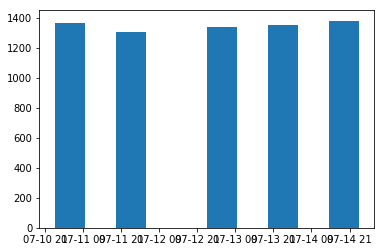

In [77]:
plt.hist(dfu['Request Date'])

In [133]:
import matplotlib, matplotlib.pyplot as plt, seaborn as sns
#matplotlib.dates.date2num(dfu['Request timestamp'].dt.time)dfu['Request Date'].describe()

In [79]:
dfu.describe()

,Request id,Driver id,TripDuration
count,6745.000000,4095.000000,2831
mean,3384.644922,149.501343,0 days 00:52:24.825150
std,1955.099667,86.051994,0 days 00:13:51.041580
min,1.000000,1.000000,0 days 00:20:47
25%,1691.000000,75.000000,0 days 00:41:00
50%,3387.000000,149.000000,0 days 00:52:05
75%,5080.000000,224.000000,0 days 01:04:00
max,6766.000000,300.000000,0 days 01:23:00


C:\Users\ux012045\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ux012045\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([1367.,    0., 1307.,    0.,    0., 1337.,    0., 1353.,    0.,
        1381.]),
 array([11. , 11.4, 11.8, 12.2, 12.6, 13. , 13.4, 13.8, 14.2, 14.6, 15. ]),
 <a list of 10 Patch objects>)

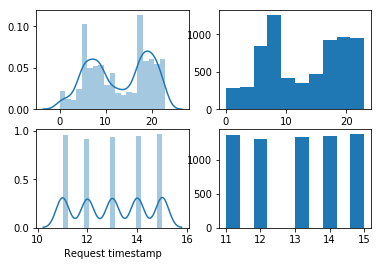

In [134]:
import matplotlib, matplotlib.pyplot as plt, seaborn as sns
#matplotlib.dates.date2num(dfu['Request timestamp'].dt.time)


plt.subplot(221)
sns.distplot(dfu['Request timestamp'].dt.hour)
plt.subplot(222)
plt.hist(dfu['Request timestamp'].dt.hour)
plt.subplot(223)
sns.distplot(c)

plt.subplot(224)
plt.hist(dfu['Request timestamp'].dt.day)


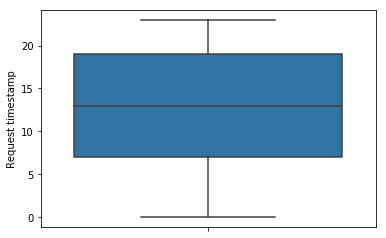

In [140]:
#sns.boxplot(dfu['Request timestamp'].dt.day)
sns.boxplot(y=dfu['Request timestamp'].dt.hour)

In [141]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 14 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
TripDuration         2831 non-null timedelta64[ns]
day_of_week          6745 non-null object
Request Date         6745 non-null datetime64[ns]
Drop Date            2831 non-null datetime64[ns]
Request Time         6745 non-null object
Drop Time            2831 non-null object
Time Slots           6745 non-null object
Type of request      6745 non-null object
dtypes: datetime64[ns](4), float64(1), int64(1), object(7), timedelta64[ns](1)
memory usage: 737.8+ KB


In [147]:
# pairplot
#sns.pairplot(dfu)
#plt.show()

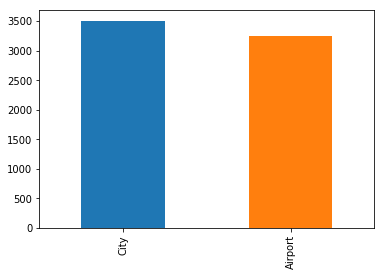

In [149]:
dfu['Pickup point'].value_counts()[:20].plot(kind='bar')

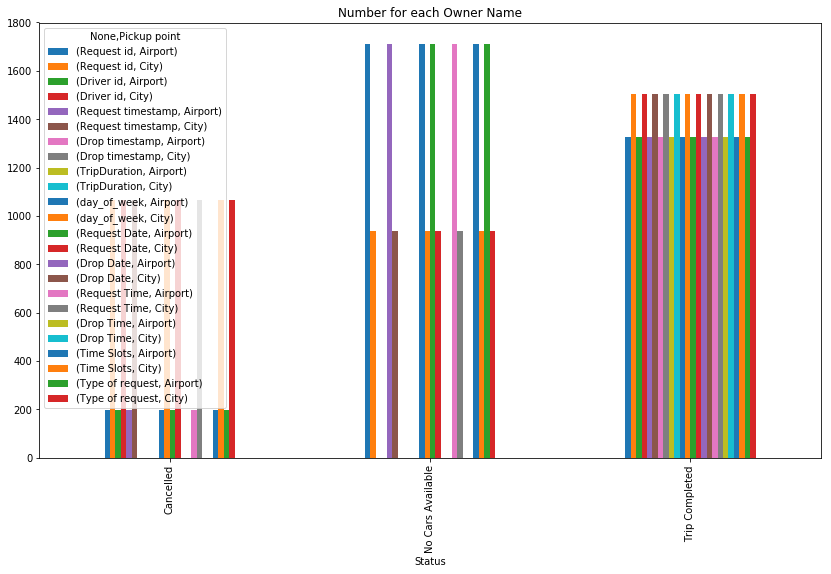

In [321]:
dfu.groupby(['Pickup point','Status']).count().unstack(0).plot.bar(title="Number for each Owner Name", figsize=(14,8))

In [155]:
#dfu['Pickup point','Status'].value_counts()[:20].plot(kind='bar')

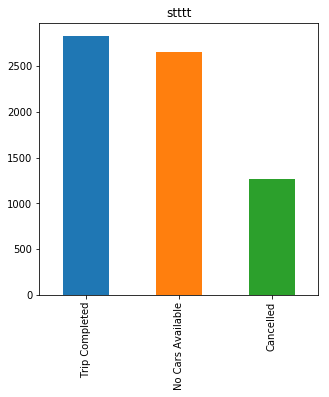

In [183]:
dfu['Status'].value_counts().plot(kind='bar',
                                         figsize=(5,5),
                                         title='stttt')
plt.show()

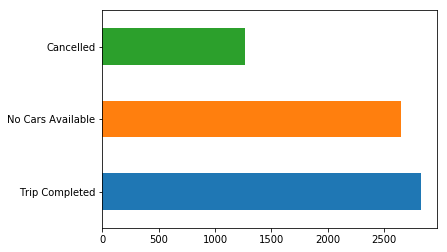

In [164]:
dfu['Status'].value_counts().plot(kind='barh')

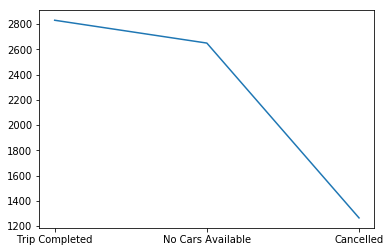

In [174]:
plt.plot(dfu['Status'].value_counts())

In [184]:
dfu

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TripDuration,day_of_week,Request Date,Drop Date,Request Time,Drop Time,Time Slots,Type of request
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,01:09:00,Monday,2016-07-11,2016-07-11,11:51:00,13:00:00,Morning,Airport to City
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,00:50:00,Monday,2016-07-11,2016-07-11,17:57:00,18:47:00,Evening,Airport to City
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,00:41:00,Tuesday,2016-07-12,2016-07-12,09:17:00,09:58:00,Early Morning,City to Airport
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,00:55:00,Tuesday,2016-07-12,2016-07-12,21:08:00,22:03:00,Late Evenings,Airport to City
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,Wednesday,2016-07-13,2016-07-13,08:33:16,09:25:47,Early Morning,City to Airport
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,00:31:31,Wednesday,2016-07-13,2016-07-13,21:57:28,22:28:59,Late Evenings,Airport to City
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,00:57:43,Thursday,2016-07-14,2016-07-14,06:15:32,07:13:15,Early Morning,Airport to City
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,00:56:00,Friday,2016-07-15,2016-07-15,05:11:52,06:07:52,Early Morning,Airport to City
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,00:53:24,Friday,2016-07-15,2016-07-15,17:57:27,18:50:51,Evening,City to Airport
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,00:39:00,Monday,2016-07-11,2016-07-11,06:46:00,07:25:00,Early Morning,City to Airport


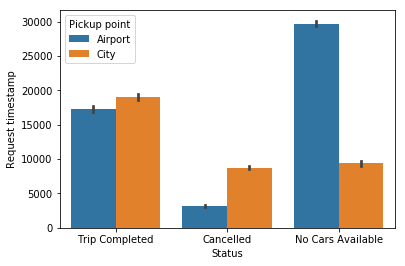

In [330]:
sns.barplot(y=dfu['Request timestamp'].dt.hour,x=dfu['Status'],hue=dfu['Pickup point'],estimator=sum)
plt.show()

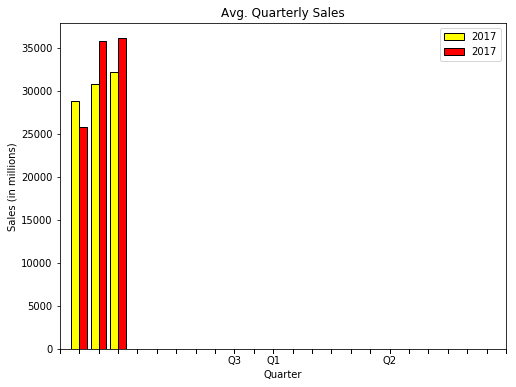

In [230]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set(title='Avg. Quarterly Sales',
      xlabel='Quarter', ylabel='Sales (in millions)')
quarters = dfu['Request timestamp'].dt.hour
x1_index = [0.8, 1.8, 2.8]; x2_index = [1.2, 2.2, 3.2]
sales_2016 = [28831, 30762, 32178]; sales_2017 = [25782, 35783, 36133]
ax.bar(x1_index, sales_2016, color='yellow', width=0.4, edgecolor='black', label='2017')
ax.bar(x2_index, sales_2017, color='red', width=0.4, edgecolor='black', label='2017')
ax.set_xticks(quarters)
ax.set_xticklabels(['Q1', 'Q2', 'Q3'])
ax.legend()
plt.show()

In [222]:
pd.cut([0, 1, 1, 2], bins=4, labels=False)
#array([0, 1, 1, 3])

array([0, 1, 1, 3], dtype=int64)

In [231]:
#pd.cut(dfu['Request timestamp'].dt.day,2,labels=['a','b'])

In [239]:
dfu.groupby(['Status'],as_index=False).count()

,Status,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,TripDuration,day_of_week,Request Date,Drop Date,Request Time,Drop Time,Time Slots,Type of request
0,Cancelled,1264,1264,1264,1264,0,0,1264,1264,0,1264,0,1264,1264
1,No Cars Available,2650,2650,0,2650,0,0,2650,2650,0,2650,0,2650,2650
2,Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [269]:
dfu.groupby([dfu['Request timestamp'].dt.day],as_index=False).count()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TripDuration,day_of_week,Request Date,Drop Date,Request Time,Drop Time,Time Slots,Type of request
0,1367,1367,863,1367,1367,601,601,1367,1367,601,1367,601,1367,1367
1,1307,1307,802,1307,1307,562,562,1307,1307,562,1307,562,1307,1307
2,1337,1337,847,1337,1337,577,577,1337,1337,577,1337,577,1337,1337
3,1353,1353,782,1353,1353,530,530,1353,1353,530,1353,530,1353,1353
4,1381,1381,801,1381,1381,561,561,1381,1381,561,1381,561,1381,1381


In [244]:
dfu.groupby(dfu['Request timestamp'].dt.day).count()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TripDuration,day_of_week,Request Date,Drop Date,Request Time,Drop Time,Time Slots,Type of request
Request timestamp,,,,,,,,,,,,,,
11,1367,1367,863,1367,1367,601,601,1367,1367,601,1367,601,1367,1367
12,1307,1307,802,1307,1307,562,562,1307,1307,562,1307,562,1307,1307
13,1337,1337,847,1337,1337,577,577,1337,1337,577,1337,577,1337,1337
14,1353,1353,782,1353,1353,530,530,1353,1353,530,1353,530,1353,1353
15,1381,1381,801,1381,1381,561,561,1381,1381,561,1381,561,1381,1381


In [265]:
dfu.groupby(['Status','Pickup point']).count().reset_index()

,Status,Pickup point,Request id,Driver id,Request timestamp,Drop timestamp,TripDuration,day_of_week,Request Date,Drop Date,Request Time,Drop Time,Time Slots,Type of request
0,Cancelled,Airport,198,198,198,0,0,198,198,0,198,0,198,198
1,Cancelled,City,1066,1066,1066,0,0,1066,1066,0,1066,0,1066,1066
2,No Cars Available,Airport,1713,0,1713,0,0,1713,1713,0,1713,0,1713,1713
3,No Cars Available,City,937,0,937,0,0,937,937,0,937,0,937,937
4,Trip Completed,Airport,1327,1327,1327,1327,1327,1327,1327,1327,1327,1327,1327,1327
5,Trip Completed,City,1504,1504,1504,1504,1504,1504,1504,1504,1504,1504,1504,1504


In [259]:
dfu.groupby(['Time Slots','Status','Pickup point']).count()

Request id  Driver id  \
Time Slots    Status            Pickup point                          
Afternoon     Cancelled         Airport               40         40   
                                City                  32         32   
              No Cars Available Airport               50          0   
                                City                 134          0   
              Trip Completed    Airport              162        162   
                                City                 208        208   
Early Morning Cancelled         Airport               23         23   
                                City                 820        820   
              No Cars Available Airport               21          0   
                                City                 385          0   
              Trip Completed    Airport              382        382   
                                City                 472        472   
Evening       Cancelled         Airport               78         78   
                                City                  46         46   
              No Cars Available Airport             1067          0   
                                City                  60          0   
              Trip Completed    Airport              312        312   
                                City                 330        330   
Late Evenings Cancelled         Airport               31         31   
                                City                  33         33   
              No Cars Available Airport              390          0   
                                City                  94          0   
              Trip Completed    Airport              203        203   
                                City                 196        196   
Late Night    Cancelled         Airport                2          2   
                                City                  63         63   
              No Cars Available Airport              148          0   
                                City                 151          0   
              Trip Completed    Airport              103        103   
                                City                 111        111   
Morning       Cancelled         Airport               24         24   
                                City                  72         72   
              No Cars Available Airport               37          0   
                                City                 113          0   
              Trip Completed    Airport              165        165   
                                City                 187        187   

                                              Request timestamp  \
Time Slots    Status            Pickup point                      
Afternoon     Cancelled         Airport                      40   
                                City                         32   
              No Cars Available Airport                      50   
                                City                        134   
              Trip Completed    Airport                     162   
                                City                        208   
Early Morning Cancelled         Airport                      23   
                                City                        820   
              No Cars Available Airport                      21   
                                City                        385   
              Trip Completed    Airport                     382   
                                City                        472   
Evening       Cancelled         Airport                      78   
                                City                         46   
              No Cars Available Airport                    1067   
                                City                         60   
              Trip Completed    Airport                     312   
                                City                        330   
Late Ev

In [263]:
dfu.groupby(['day_of_week','Status']).count()

Request id  Pickup point  Driver id  \
day_of_week Status                                                   
Friday      Cancelled                 240           240        240   
            No Cars Available         580           580          0   
            Trip Completed            561           561        561   
Monday      Cancelled                 262           262        262   
            No Cars Available         504           504          0   
            Trip Completed            601           601        601   
Thursday    Cancelled                 252           252        252   
            No Cars Available         571           571          0   
            Trip Completed            530           530        530   
Tuesday     Cancelled                 240           240        240   
            No Cars Available         505           505          0   
            Trip Completed            562           562        562   
Wednesday   Cancelled                 270           270        270   
            No Cars Available         490           490          0   
            Trip Completed            577           577        577   

                               Request timestamp  Drop timestamp  \
day_of_week Status                                                 
Friday      Cancelled                        240               0   
            No Cars Available                580               0   
            Trip Completed                   561             561   
Monday      Cancelled                        262               0   
            No Cars Available                504               0   
            Trip Completed                   601             601   
Thursday    Cancelled                        252               0   
            No Cars Available                571               0   
            Trip Completed                   530             530   
Tuesday     Cancelled                        240               0   
            No Cars Available                505               0   
            Trip Completed                   562             562   
Wednesday   Cancelled                        270               0   
            No Cars Available                490               0   
            Trip Completed                   577             577   

                               TripDuration  Request Date  Drop Date  \
day_of_week Status                                                     
Friday      Cancelled                     0           240          0   
            No Cars Available             0           580          0   
            Trip Completed              561           561        561   
Monday      Cancelled                     0           262          0   
            No Cars Available             0           504          0   
            Trip Completed              601           601        601   
Thursday    Cancelled                     0           252          0   
            No Cars Available             0           571          0   
            Trip Completed              530           530        530   
Tuesday     Cancelled                     0           240          0   
            No Cars Available             0           505          0   
            Trip Completed              562           562        562   
Wednesday   Cancelled                     0           270          0   
            No Cars Available             0           490          0   
            Trip Completed              577           577        577   

                               Request Time  Drop Time  Time Slots  \
day_of_week Status                                                   
Friday      Cancelled                   240          0         240   
            No Cars Available           580          0         580   
            Trip Completed              561        561         561   
Monday      Cancelled                   262          0         262   
            No Cars Available         

In [306]:
x=dfu.groupby([dfu['Request timestamp'].dt.day,'Status','Pickup point']).count()

In [273]:
#dfu.groupby([dfu['Request timestamp'].dt.day,'Status','Pickup point'],as_index=False).count()
dfu['Request timestamp'].dt.day.unique()

array([11, 12, 13, 14, 15], dtype=int64)

In [ ]:
sns.barplot(y=dfu['Request timestamp'].dt.hour,x=dfu['Status'],hue=dfu['Pickup point'],estimator=sum)
plt.show()

In [291]:
x.columns=['Request id', 'Driver id', 'Request timestamp1', 'Drop timestamp',
       'TripDuration', 'day_of_week', 'Request Date', 'Drop Date',
       'Request Time', 'Drop Time', 'Time Slots', 'Type of request']

In [300]:
#dfm=x.reset_index()
dfm.columns

Index(['Request timestamp', 'Status', 'Pickup point', 'Request id',
       'Driver id', 'Request timestamp1', 'Drop timestamp', 'TripDuration',
       'day_of_week', 'Request Date', 'Drop Date', 'Request Time', 'Drop Time',
       'Time Slots', 'Type of request'],
      dtype='object')

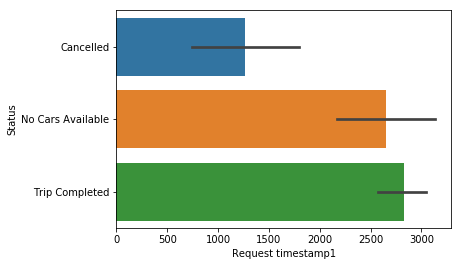

In [309]:
sns.barplot(x='Request timestamp1',y='Status',data=dfm,estimator=sum)

In [314]:
sns.

Request timestamp  Status             Pickup point
11                 Cancelled          Airport          42
                                      City            220
                   No Cars Available  Airport         338
                                      City            166
                   Trip Completed     Airport         281
                                      City            320
12                 Cancelled          Airport          45
                                      City            195
                   No Cars Available  Airport         350
                                      City            155
                   Trip Completed     Airport         289
                                      City            273
13                 Cancelled          Airport          48
                                      City            222
                   No Cars Available  Airport         317
                                      City            173
                   Tr

In [319]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(*args, **kwargs)
    Make a bar plot.
    
    Call signatures::
    
       bar(x, height, *, align='center', **kwargs)
       bar(x, height, width, *, align='center', **kwargs)
       bar(x, height, width, bottom, *, align='center', **kwargs)
    
    The bars are positioned at *x* with the given *align* ment. Their
    dimensions are given by *width* and *height*. The vertical baseline
    is *bottom* (default 0).
    
    Each of *x*, *height*, *width*, and *bottom* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    
    Parameters
    ----------
    x : sequence of scalars
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : scalar or sequence of scalars
        The height(s) of the bars.
    
    width : scalar or array-like, optional
        The width(s) of the

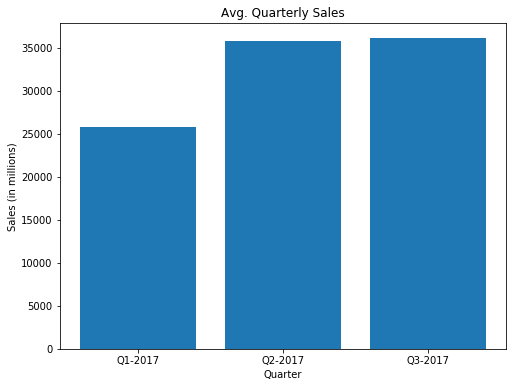

In [326]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set(title='Avg. Quarterly Sales',
      xlabel='Quarter', ylabel='Sales (in millions)')
quarters = [1, 2, 3]
sales_2017 = [25782, 35783, 36133]
ax.bar(quarters, sales_2017)
ax.set_xticks(quarters)
ax.set_xticklabels(['Q1-2017', 'Q2-2017', 'Q3-2017'])
plt.show()

([<matplotlib.patches.Wedge at 0x2378a4d9358>,
 [Text(-0.811019,0.743134,'Q1-2017'),
  Text(-0.35941,-1.03963,'Q2-2017'),
  Text(1.00932,0.437358,'Q3-2017')],
 [Text(-0.442374,0.405346,'26.4%'),
  Text(-0.196042,-0.567069,'36.6%'),
  Text(0.550536,0.238559,'37.0%')])

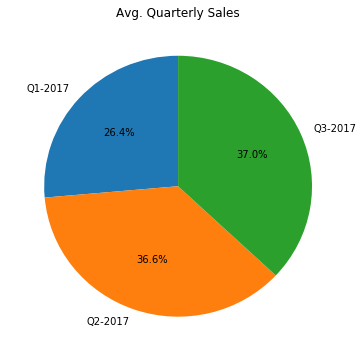

In [338]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set(title='Avg. Quarterly Sales')
sales_2017 = [25782, 35783, 36133]
quarters = ['Q1-2017', 'Q2-2017', 'Q3-2017']
ax.pie(sales_2017, labels=quarters, startangle=90, autopct='%1.1f%%')
plt.show()

In [337]:
#dfu.groupby([dfu['Request timestamp'].dt.hour,'Status'],as_index=False).count()

In [2]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

df2 = df.groupby(['Name', 'Abuse/NFF'])['Name'].count().unstack('Abuse/NFF').fillna(0)
df2[['abuse','nff']].plot(kind='bar', stacked=True)

Populating the interactive namespace from numpy and matplotlib


NameError: name 'df' is not defined

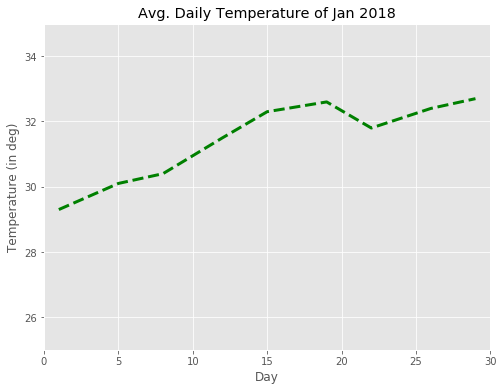

In [3]:
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.set(title='Avg. Daily Temperature of Jan 2018',
      xlabel='Day', ylabel='Temperature (in deg)',
      xlim=(0, 30), ylim=(25, 35))
    days = [1, 5, 8, 12, 15, 19, 22, 26, 29]
    temp = [29.3, 30.1, 30.4, 31.5, 32.3, 32.6, 31.8, 32.4, 32.7]
    ax.plot(days, temp, color='green', linestyle='--', linewidth=3)
    plt.show()

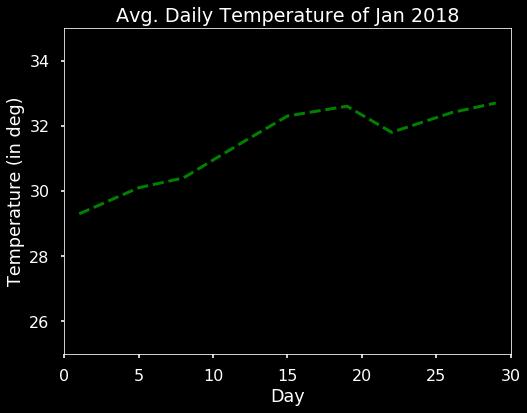

In [5]:
with plt.style.context(['dark_background', 'seaborn-poster']):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.set(title='Avg. Daily Temperature of Jan 2018',
      xlabel='Day', ylabel='Temperature (in deg)',
      xlim=(0, 30), ylim=(25, 35))
    days = [1, 5, 8, 12, 15, 19, 22, 26, 29]
    temp = [29.3, 30.1, 30.4, 31.5, 32.3, 32.6, 31.8, 32.4, 32.7]
    ax.plot(days, temp, color='green', linestyle='--', linewidth=3)
    plt.show()

In [7]:
import matplotlib
print(matplotlib.get_configdir())

C:\Users\ux012045\.matplotlib


In [8]:
axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 8
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16

NameError: name 'lines' is not defined

In [ ]:
matplotlib.style.re_load()
with plt.style.context(['dark_background', 'mystyle']):
    import matplotlib
matplotlib.matplotlib_fname()